In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/healthcare_datasets.csv")
df.head()

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
0,0f5343ac-b858-4726-b8e6-d0e5a7cd73ff,84,Male,95,157,Hypertension
1,ff6cbae7-14d6-486d-a03b-c174dce2b9c0,40,Male,163,285,NaN
2,cc32f20a-c701-4398-85cc-30cfe5e7a62a,72,Male,NAN,168,NaN
3,93c316b3-c2ff-42a9-9895-7ce3e3d6cd8a,39,Male,118,288,Diabetes
4,044838d9-29a8-46da-8d74-18705c8df5d7,28,Female,128,229,Diabetes


In [ ]:
df.dtypes

Patient_ID        object
Age               object
Gender            object
Blood_Pressure    object
Cholesterol       object
Condition         object
dtype: object

In [ ]:
df.shape #shape of the dataset

(3021, 6)

In [ ]:
#Replace placeholders with np.nan
df.replace(['NAN'], np.nan, inplace=True)

In [ ]:
#checking the null values present in dataset
df.isnull().sum()

Patient_ID          4
Age                 2
Gender              4
Blood_Pressure      3
Cholesterol         2
Condition         994
dtype: int64

In [ ]:
#removing rows which contains null values in Patient_ID and Gender
df.dropna(subset=['Patient_ID','Gender'],inplace=True)

In [ ]:
df.isnull().sum()

Patient_ID          0
Age                 2
Gender              0
Blood_Pressure      3
Cholesterol         2
Condition         993
dtype: int64

In [ ]:

# Convert Age,Blood_Pressure,Cholestrol column to numeric
df[['Age', 'Blood_Pressure', 'Cholesterol']] = df[['Age', 'Blood_Pressure', 'Cholesterol']].apply(pd.to_numeric, errors='coerce')
# Fill missing values in selected columns with the mean of each column
df[['Age', 'Blood_Pressure', 'Cholesterol']] = df[['Age', 'Blood_Pressure', 'Cholesterol']].fillna(df[['Age', 'Blood_Pressure', 'Cholesterol']].mean())

In [ ]:
df.isnull().sum()

Patient_ID          0
Age                 0
Gender              0
Blood_Pressure      0
Cholesterol         0
Condition         993
dtype: int64

In [ ]:
#If we consider NaN as "Normal condition" in condition column
df['Condition'].fillna('Normal', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3013 entries, 0 to 3020
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      3013 non-null   object 
 1   Age             3013 non-null   float64
 2   Gender          3013 non-null   object 
 3   Blood_Pressure  3013 non-null   float64
 4   Cholesterol     3013 non-null   float64
 5   Condition       3013 non-null   object 
dtypes: float64(3), object(3)
memory usage: 164.8+ KB


In [ ]:
df.describe()

,Age,Blood_Pressure,Cholesterol
count,3013.000000,3013.000000,3013.000000
mean,54.020259,131.019934,197.544005
std,20.985385,29.424001,57.887240
min,18.000000,80.000000,100.000000
25%,36.000000,106.000000,149.000000
50%,54.000000,131.019934,194.000000
75%,72.000000,157.000000,248.000000
max,90.000000,180.000000,300.000000


In [ ]:
#check wheather duplicate rows are present or not
df.duplicated().sum()


20

In [ ]:
#remove duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#After removing duplicate rows shape of the dataset
df.shape

(2993, 6)

Checking outliers with Boxplot

<Axes: ylabel='Blood_Pressure'>

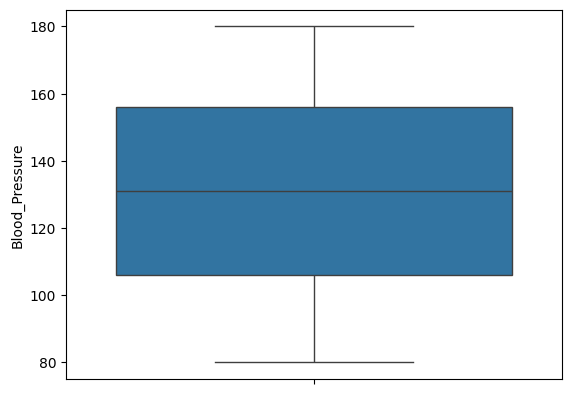

In [ ]:
sns.boxplot(df['Blood_Pressure'])

<Axes: ylabel='Cholesterol'>

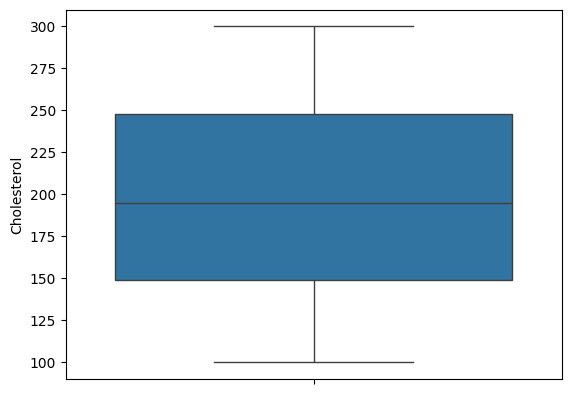

In [ ]:
sns.boxplot(df['Cholesterol'])

<Axes: ylabel='Age'>

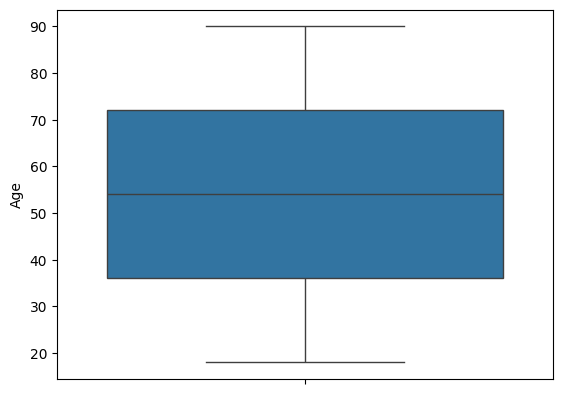

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
#checking outliers with Inter Quartile Range
num_clmn=df.select_dtypes(include=['float64','int64']).columns
outliers_dic={}
for column in num_clmn:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
  outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
  outliers_dic[column]=outliers
for column, outliers in outliers_dic.items():
    print(f"{column}: {len(outliers)} outliers")

Age: 0 outliers
Blood_Pressure: 0 outliers
Cholesterol: 0 outliers


In [ ]:
#standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Age', 'Blood_Pressure', 'Cholesterol']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("DataFrame after Standard Scaling:")
print(df)


DataFrame after Standard Scaling:
                                Patient_ID       Age  Gender  Blood_Pressure  \
0     0f5343ac-b858-4726-b8e6-d0e5a7cd73ff  1.429552    Male       -1.223903   
1     ff6cbae7-14d6-486d-a03b-c174dce2b9c0 -0.669416    Male        1.088642   
2     cc32f20a-c701-4398-85cc-30cfe5e7a62a  0.857106    Male        0.001064   
3     93c316b3-c2ff-42a9-9895-7ce3e3d6cd8a -0.717120    Male       -0.441718   
4     044838d9-29a8-46da-8d74-18705c8df5d7 -1.241862  Female       -0.101638   
...                                    ...       ...     ...             ...   
3016  6516343d-4f84-42cc-9805-307da385d003  0.904810  Female       -1.189895   
3017  7ef7b2c4-4cbd-44de-887d-aa07548e7e18 -1.146454  Female       -1.121879   
3018  e060b7f8-a5ff-44ab-8caf-cd909f08c724 -0.096970    Male       -1.257911   
3019  ed118b6f-bf81-4af9-99ee-98eafb3c52e1 -1.575788    Male        1.292690   
3020  f9f7e5f2-3ba7-45d9-b50f-29cbc5ba60e9  1.191033    Male       -1.393943   

     

In [ ]:
#label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Patient_ID'] = le.fit_transform(df['Patient_ID'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Condition'] = le.fit_transform(df['Condition'])

In [ ]:
df.head()

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
0,177,1.429552,1,-1.223903,-0.701893,1
1,2989,-0.669416,1,1.088642,1.510584,2
2,2381,0.857106,1,0.001064,-0.511758,2
3,1723,-0.717120,1,-0.441718,1.562439,0
4,44,-1.241862,0,-0.101638,0.542625,0


**Summary of Data Cleaning Operations**




1.   Initially imported required libraries
2.   Started with Loading Dataset, containing patient information.
3.   Handling Missing values, Replaced the placeholders with np.nan.
4.  Converted columns Age, Blood_Pressure, and Cholesterol to numeric.
5.  Filled missing values in the Age, Blood_Pressure, and Cholesterol
     columns with the mean of each respective column.
6.  Removed duplicate rows using df.drop_duplicates(inplace=True) to ensure unique records in the dataset.
7.  Used the Boxplot and IQR method to detect and handle the outliers present in the numerical columns.
8.   Encoded the categorical columns to numerical columns using Label Encoder method.
9.  Applied StandardScaler from sklearn.preprocessing to scale numerical features. This transformation standardizes the features to have a mean of 0 and a standard deviation of 1, which can improve the performance of many machine learning models.
